# Projeto Final - Machine Learning:
#### Integrantes: 
    - Natália Queiroz Menezes Carreras
    - Willian Kenzo Asanuma Lee
#### Database: https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset

#### Bibliotecas necessárias:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import pickle
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#### Importando o Dataset:

In [2]:
filename = pathlib.Path.cwd()/'customer_shopping_data.csv'
data = pd.read_csv(filename)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


#### Analisando o dataset:

##### Category:

In [5]:
data['category'] = data['category'].astype('category')
data['category'].value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

##### Gender:

In [6]:
data['gender'] = data['gender'].astype('category')
data['gender'].value_counts()

Female    59482
Male      39975
Name: gender, dtype: int64

##### Payment method:

In [8]:
data['payment_method'] = data['payment_method'].astype('category')
data['payment_method'].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

##### Shopping mall:

In [9]:
data['shopping_mall'] = data['shopping_mall'].astype('category')
data['shopping_mall'].value_counts()

Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64

##### Age, quantity and price:

In [10]:
data.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,99457.0,43.427089,14.990054,18.00,30.00,43.0,56.00,69.0
quantity,99457.0,3.003429,1.413025,1.00,2.00,3.0,4.00,5.0
price,99457.0,689.256321,941.184567,5.23,45.45,203.3,1200.32,5250.0


#### Separando as variáveis em contínuas e categoricas:

In [18]:
categorical_variables = [
    'gender',
]
continuous_variables = [
    'age',
]

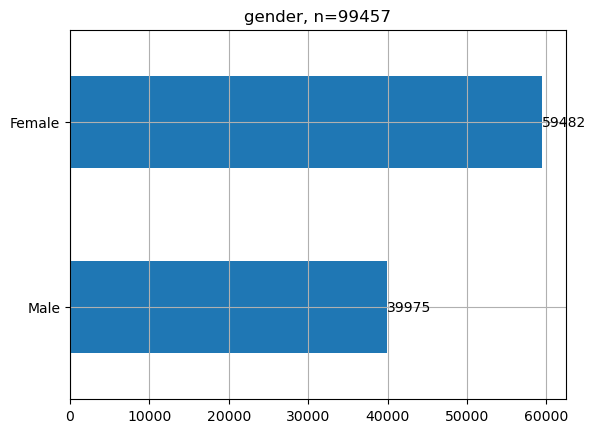

In [17]:
def plot_categoricals(data, cols, sorted=True):
    summary = data[cols].describe().transpose().sort_values(by='count')
    
    for k, (col, val) in enumerate(summary['count'].items()):
        plt.figure()
        ser = data[col].value_counts()
        if sorted:
            ser = ser.sort_values()
        else:
            ser = ser.sort_index()
        ax = ser.plot.barh()
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'{col}, n={int(val)}')
        plt.grid()
        plt.show()
plot_categoricals(data, categorical_variables)